<a href="https://colab.research.google.com/github/Jake0925/Pandas/blob/master/Binning_%EA%B5%AC%EA%B0%84%EB%82%98%EB%88%84%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.DataFrame({"a": np.random.random(100), 
                   "b": np.random.random(100), 
                   "id": np.arange(100)})
df

,a,b,id
0,0.373753,0.220072,0
1,0.283010,0.347903,1
2,0.640066,0.509605,2
3,0.277939,0.888335,3
4,0.577791,0.601229,4
...,...,...,...
95,0.656855,0.335363,95
96,0.339428,0.383155,96
97,0.783426,0.703618,97
98,0.189161,0.729808,98


In [4]:
# ex1)
bins = np.linspace(0, 1, 10) # 0~1범위 내에서 10개의 구간을 만든다
groups = df.groupby(np.digitize(df.a, bins))
print(groups.mean()) # 각구간의 평균값이 대표값으로 표시된다

          a         b         id
1  0.052370  0.423135  53.444444
2  0.173985  0.483096  59.846154
3  0.250056  0.557529  38.437500
4  0.390915  0.510417  54.000000
5  0.494221  0.545248  37.750000
6  0.614801  0.410325  51.555556
7  0.726296  0.496754  34.083333
8  0.821747  0.598414  60.000000
9  0.929418  0.538418  57.833333


In [5]:
# ex2)
bins = np.linspace(df.a.min(), df.a.max(), 10)
groups = df.groupby(np.digitize(df.a, bins))
print(groups.mean()) # 각구간의 평균값 표시 Also could do "groups.aggregate(np.mean)"
print(groups.median()) # 각구간의 중앙값 표시
# Apply some arbitrary function to aggregate binned data
print(groups.aggregate(lambda x: np.mean(x[x > 0.5])))

           a         b         id
1   0.052370  0.423135  53.444444
2   0.173985  0.483096  59.846154
3   0.250056  0.557529  38.437500
4   0.380077  0.463153  58.222222
5   0.483314  0.580820  37.200000
6   0.609544  0.419695  46.125000
7   0.711785  0.433675  37.363636
8   0.807651  0.649275  56.625000
9   0.909411  0.479290  65.000000
10  0.978930  0.587677  39.000000
           a         b    id
1   0.062967  0.397484  59.0
2   0.175714  0.507277  56.0
3   0.249389  0.643988  35.5
4   0.380656  0.383155  55.0
5   0.489126  0.562386  34.0
6   0.611221  0.449454  50.0
7   0.707875  0.339901  21.0
8   0.805263  0.653188  61.0
9   0.907650  0.459375  69.0
10  0.978930  0.587677  39.0
           a         b         id
1        NaN  0.810344  53.444444
2        NaN  0.704909  59.846154
3        NaN  0.801856  38.437500
4        NaN  0.755749  65.500000
5   0.517767  0.722048  37.200000
6   0.609544  0.604016  46.125000
7   0.711785  0.757733  37.363636
8   0.807651  0.811147  56.625000
9

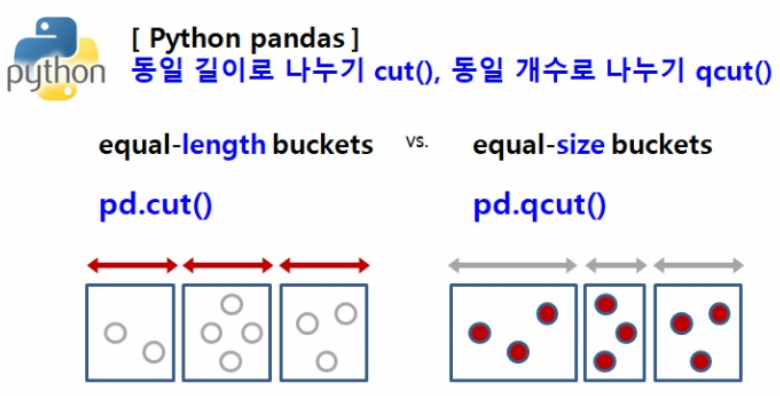

In [38]:
# ex3)
bins = np.linspace(df.a.min(), df.a.max(), 10)
groups_0 = df.groupby(pd.cut(df.a, bins))
print(groups_0.mean().b)

# pd.cut
groups_1 = df.groupby(pd.cut(df.a, 10))
groups_1.agg(['count', 'mean', 'std', 'min', 'max'])

# pd.qcut
groups_2 = df.groupby(pd.qcut(df.a, 10))
groups_2.agg(['count', 'mean', 'std', 'min', 'max'])

a
(0.00617, 0.114]    0.355120
(0.114, 0.222]      0.483096
(0.222, 0.33]       0.557529
(0.33, 0.439]       0.463153
(0.439, 0.547]      0.580820
(0.547, 0.655]      0.419695
(0.655, 0.763]      0.433675
(0.763, 0.871]      0.649275
(0.871, 0.979]      0.492839
Name: b, dtype: float64


a                                ...    id                   
                 count      mean       std       min  ...  mean        std min max
a                                                     ...                         
(0.00517, 0.125]    10  0.058635  0.042080  0.006170  ...  52.8  20.552372  22  79
(0.125, 0.207]      10  0.173175  0.026631  0.126542  ...  64.8  24.516661  28  99
(0.207, 0.25]       10  0.226971  0.012609  0.207460  ...  36.1  23.028726   5  80
(0.25, 0.362]       10  0.283879  0.037100  0.249843  ...  48.1  35.485365   1  96
(0.362, 0.452]      10  0.405436  0.028815  0.367704  ...  52.3  30.865479   0  94
(0.452, 0.589]      10  0.523412  0.041779  0.457577  ...  29.9  21.594495   4  66
(0.589, 0.706]      10  0.654465  0.031765  0.597965  ...  45.5  37.214842   2  95
(0.706, 0.783]      10  0.753960  0.025663  0.707875  ...  44.5  31.802341   8  92
(0.783, 0.844]      10  0.812697  0.020366  0.783426  ...  65.7  26.415694  12  97
(0.844, 0.979]      10  0.903476  0.042851  0.844354  ...  55.3  25.460427  14  91

[10 rows x 15 columns]

pd.cut()
- 나누고 싶은 범주범위 설정하기

In [37]:
data_value = np.random.randint(21, 80, size = 1000)
data = pd.DataFrame({"Age": data_value})

# 1. 나누고 싶은 범주 정의
bins = [20,30,40,50,60,70,80]

# 2. 범주화 이름 정의 - 범주이름 갯수는 위의 bins갯수보다 하나 작아야 한다
bins_names = ['20대',"30대",'40대',"50대",'60대','70대']

# 3. 범주화하고 싶은 데이터 가져와서 범주화 해주기
categories = pd.cut(data.Age, bins, labels = bins_names)
categories=pd.DataFrame(categories)
categories

,Age
0,50대
1,70대
2,70대
3,20대
4,20대
...,...
995,30대
996,60대
997,30대
998,20대
